In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../data/f_dataset.csv')
try:
    data.drop('Unnamed: 0',axis=1,inplace=True)
except:
    pass
data

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,...,Popular,Very_Popular,Young,Somehow_Old,Old,Very_Old,Short,Somehow_Long,Long,Very_Long
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251.0,1995,26,12,Sega Genesis,Platformer,NaN,...,1,0,1,0,0,0,0,0,1,0
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,1517.0,2000,21,2,Dreamcast,3D Platformer,NaN,...,0,0,1,0,0,0,0,0,1,0
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436.0,2003,18,11,Game Boy Advance,NaN,NaN,...,1,0,1,0,0,0,0,0,0,1
3,Black Castle,Any%,Black Castle - Any%,512.0,2020,1,3,Game Boy Color,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797.0,1994,27,41,GameCube,Action,NaN,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657.0,1987,34,33,Nintendo Entertainment System,NaN,NaN,...,0,1,0,0,0,1,1,0,0,0
454,Totally Rad,Any%,Totally Rad - Any%,848.0,1991,30,4,Nintendo Entertainment System,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
455,Dragon Fighter,Any%,Dragon Fighter - Any%,808.0,1990,31,9,Nintendo Entertainment System,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0
456,Kendo Rage,Any%,Kendo Rage - Any%,693.0,1993,28,1,Super Nintendo,Action-game,NaN,...,0,0,1,0,0,0,0,1,0,0


In [3]:
data.columns

Index(['game', 'category', 'game+category', 'time', 'released_year', 'age',
       'nb_of_runs', 'main_platform', 'main_genre', 'engine', 'developer',
       'publisher', 'TAS_time', 'emulator', 'time_difference',
       '%_of_difference', 'Unpopular', 'Somehow_Popular', 'Popular',
       'Very_Popular', 'Young', 'Somehow_Old', 'Old', 'Very_Old', 'Short',
       'Somehow_Long', 'Long', 'Very_Long'],
      dtype='object')

In [4]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(data['time'].values.reshape(-1,1))

SimpleImputer(strategy='median')

In [5]:
data['time'] = imp.transform(data['time'].values.reshape(-1,1))

In [6]:
features = ['time','main_platform','main_genre','engine','developer','publisher','emulator','Unpopular', 'Somehow_Popular', 'Popular',
       'Very_Popular', 'Young', 'Somehow_Old', 'Old', 'Very_Old', 'Short',
       'Somehow_Long']
label = ['TAS_time']

In [7]:
X = pd.get_dummies(data[features])
y = data[label]

In [8]:
X.to_csv('test.csv')

In [9]:
features = X.columns
features

Index(['time', 'Unpopular', 'Somehow_Popular', 'Popular', 'Very_Popular',
       'Young', 'Somehow_Old', 'Old', 'Very_Old', 'Short',
       ...
       'emulator_Gens', 'emulator_Hourglass', 'emulator_JPC-RR',
       'emulator_Mupen64', 'emulator_PCSX', 'emulator_PSXjin', 'emulator_VBA',
       'emulator_libTAS', 'emulator_lsnes', 'emulator_snes9x'],
      dtype='object', length=311)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [11]:
import statsmodels.api as sm
X_train_sm= sm.add_constant(X_train)

In [12]:
p_values = []
for feature in features:
    ls=sm.OLS(y_train,X_train_sm[feature]).fit()
    print(ls.summary())
    p_values.append(ls.pvalues)

                                 OLS Regression Results                                
Dep. Variable:               TAS_time   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              2453.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):                   8.12e-152
Time:                        23:22:04   Log-Likelihood:                         -2627.1
No. Observations:                 320   AIC:                                      5256.
Df Residuals:                     319   BIC:                                      5260.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
t = []
for i in range(len(p_values)):
    if p_values[i].values < 0.2 :
        print(p_values[i])
        t.append(p_values[i].index)

time    8.121523e-152
dtype: float64
Unpopular    1.178226e-07
dtype: float64
Somehow_Popular    0.000002
dtype: float64
Popular    1.472166e-07
dtype: float64
Very_Popular    1.312273e-12
dtype: float64
Young    1.026415e-21
dtype: float64
Very_Old    1.600737e-11
dtype: float64
Short    0.184732
dtype: float64
Somehow_Long    0.006527
dtype: float64
main_platform_Game Boy Advance    0.000007
dtype: float64
main_platform_Game Boy Color    0.042232
dtype: float64
main_platform_GameCube    0.003456
dtype: float64
main_platform_Nintendo 64    0.00001
dtype: float64
main_platform_Nintendo DS    7.253711e-10
dtype: float64
main_platform_Nintendo Entertainment System    0.001325
dtype: float64
main_platform_PlayStation    0.148465
dtype: float64
main_platform_PlayStation 2    0.004635
dtype: float64
main_platform_Sega Genesis    0.028682
dtype: float64
main_platform_Super Nintendo    9.020879e-08
dtype: float64
main_platform_Wii U    0.000279
dtype: float64
main_platform_Wii Virtual Console

In [14]:
t

[Index(['time'], dtype='object'),
 Index(['Unpopular'], dtype='object'),
 Index(['Somehow_Popular'], dtype='object'),
 Index(['Popular'], dtype='object'),
 Index(['Very_Popular'], dtype='object'),
 Index(['Young'], dtype='object'),
 Index(['Very_Old'], dtype='object'),
 Index(['Short'], dtype='object'),
 Index(['Somehow_Long'], dtype='object'),
 Index(['main_platform_Game Boy Advance'], dtype='object'),
 Index(['main_platform_Game Boy Color'], dtype='object'),
 Index(['main_platform_GameCube'], dtype='object'),
 Index(['main_platform_Nintendo 64'], dtype='object'),
 Index(['main_platform_Nintendo DS'], dtype='object'),
 Index(['main_platform_Nintendo Entertainment System'], dtype='object'),
 Index(['main_platform_PlayStation'], dtype='object'),
 Index(['main_platform_PlayStation 2'], dtype='object'),
 Index(['main_platform_Sega Genesis'], dtype='object'),
 Index(['main_platform_Super Nintendo'], dtype='object'),
 Index(['main_platform_Wii U'], dtype='object'),
 Index(['main_platform_Wi

In [15]:
significative_features = ['time', 
 'Unpopular', 
 'Somehow_Popular', 
 'Popular', 
 'Very_Popular', 
 'Young', 
 'Very_Old',
 'Short',
 'Somehow_Long', 
 'main_platform_Game Boy Advance', 
 'main_platform_Game Boy Color', 
 'main_platform_GameCube', 
 'main_platform_Nintendo 3DS Virtual Console', 
 'main_platform_Nintendo 64', 
 'main_platform_Nintendo DS', 
 'main_platform_Nintendo Entertainment System', 
 'main_platform_PlayStation', 
 'main_platform_PlayStation 2', 
 'main_platform_Sega Genesis', 
 'main_platform_Sega Saturn', 
 'main_platform_Super Nintendo', 
 'main_platform_Wii U', 
 'main_platform_Wii Virtual Console', 
 'main_genre_Action', 
 'main_genre_Action Adventure', 
 'main_genre_Action-adventure', 
 'main_genre_Capcom', 
 'main_genre_JRPG', 
 'main_genre_Platform', 
 'main_genre_Platformer', 
 'main_genre_RPG', 
 'main_genre_Role-playing Game', 
 'main_genre_Strategy', 
 'engine_A.L.I.V.E', 
 'developer_Capcom', 
 'developer_Capcom Production Studio 3', 
 'developer_Chunsoft', 
 'developer_DeerForce', 
 'developer_Game Freak', 
 'developer_Insomniac Games', 
 'developer_Intelligent Systems', 
 'developer_Konami Computer Entertainment Osaka', 
 'developer_NCS', 
 'developer_Nintendo', 
 'developer_Nintendo R&D1', 
 'developer_Rare', 
 'developer_Skawo', 
 'developer_Square', 
 'developer_Sucker Punch Productions', 
 'publisher_Capcom', 
 'publisher_Enix', 
 'publisher_GT Interactive', 
 'publisher_Hudson Soft', 
 'publisher_Nintendo', 
 'publisher_SEGA', 
 'publisher_Skawo', 
 'publisher_Sony Computer Entertainment', 
 'publisher_Square', 
 'publisher_Treco', 
 'publisher_Ubisoft', 
 'emulator_BizHawk', 
 'emulator_DeSmuME', 
 'emulator_Dolphin', 
 'emulator_Mupen64', 
 'emulator_PCSX', 
 'emulator_PSXjin', 
 'emulator_snes9x']

In [16]:
ls=sm.OLS(y_train,X_train_sm[significative_features]).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               TAS_time   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     38.47
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.64e-99
Time:                        23:22:07   Log-Likelihood:                -2535.2
No. Observations:                 320   AIC:                             5190.
Df Residuals:                     260   BIC:                             5417.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [17]:
def MeanAbsoluteError(Y_test,y_test):
    n = len(Y_test)
    num = 0
    for i in range(n):
        num += abs(y_test[i]-Y_test.loc[i,label])

    return num[label].values[0]/n
def RMSE(Y_test,y_test):
    import math
    n = len(Y_test)
    num = 0
    for i in range(n):
        num += (y_test[i]-Y_test.loc[i,label])*(y_test[i]-Y_test.loc[i,label])

    return (math.sqrt(num[label].values/n))

def bias(Y_test,y_test):
    n = len(Y_test)
    num = 0
    for i in range(n):
        num += y_test[i]-Y_test.loc[i,label]

    return num[label].values[0]/n

In [18]:
from sklearn import linear_model
model1 = linear_model.LinearRegression().fit(X_train['time'].values.reshape(-1,1), y_train)
print("Training test R² : "+str( model1.score( X_train['time'].values.reshape(-1,1), y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model1.predict(X_test['time'].values.reshape(-1,1)))))
print( "Test set RMSE : "+ str(RMSE(y_test,model1.predict(X_test['time'].values.reshape(-1,1)))) + " ("+str( RMSE(y_test,model1.predict(X_test['time'].values.reshape(-1,1))) * 100 / y_test[label].values.mean() ) +"% of the mean)")
print('Standard deviation of test set : '+str(y_test[label].values.std())+" ("+str(y_test[label].values.std()*100/y_test[label].values.mean())+"% of the mean)")


Training test R² : 0.8201044946723729
Test set Mean Absolue Error : 445.9521303841809
Test set RMSE : 927.6949250044713 (52.38171211051021% of the mean)
Standard deviation of test set : 2309.0443650271513 (130.37874188938255% of the mean)


In [19]:
ychapo_test_model1_array = model1.predict(X_test['time'].values.reshape(-1,1))
ychapo_model1 = []
for i in range(len(ychapo_test_model1_array)):
    ychapo_model1.append(ychapo_test_model1_array[i][0])

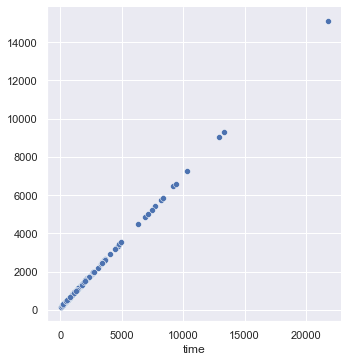

In [20]:
sns.relplot(x=X_test['time'],y=ychapo_model1)

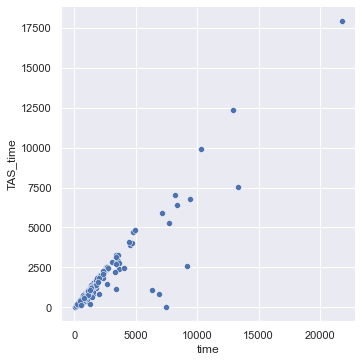

In [21]:
sns.relplot(x=X_test['time'],y=y_test['TAS_time'])

In [22]:
model1.coef_

array([[0.68685055]])

In [23]:
custom_features = ['time', 
 'Unpopular', 
 'Somehow_Popular', 
 'Popular', 
 'Very_Popular', 
 'Young', 
 'Very_Old',
 'Short',
 'Somehow_Long']

In [24]:
from sklearn import linear_model
model2 = linear_model.LinearRegression().fit(X_train[significative_features], y_train)
print("Training test R² : "+str( model2.score( X_train[significative_features], y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model2.predict(X_test[significative_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model2.predict(X_test[significative_features]))) + " ("+str( RMSE(y_test,model2.predict(X_test[significative_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.897218648509881
Test set Mean Absolue Error : 525.4220759736414
Test set RMSE : 919.8819005680676 (51.940554585865875% of the mean)


In [25]:
ychapo_test_model2_array = model2.predict(X_test[significative_features])
ychapo_model2 = []
for i in range(len(ychapo_test_model2_array)):
    ychapo_model2.append(ychapo_test_model2_array[i][0])

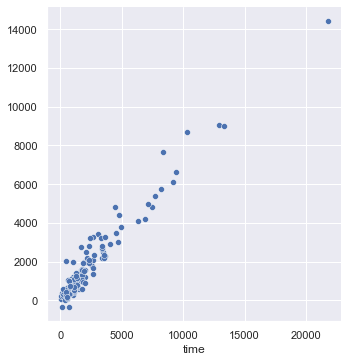

In [26]:
sns.relplot(x=X_test['time'],y=ychapo_model2)

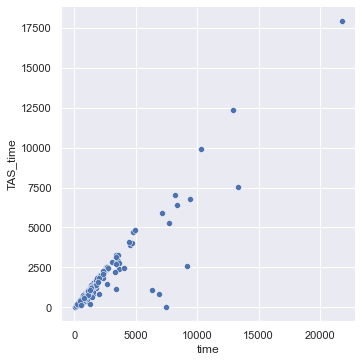

In [27]:
sns.relplot(x=X_test['time'],y=y_test['TAS_time'])

In [28]:
alphas = 10**np.linspace(10,-2,100)*0.5
model3 = linear_model.RidgeCV(alphas=alphas,cv=3).fit(X_train[significative_features], y_train)
print("Training test R² : "+str( model3.score( X_train[significative_features], y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model3.predict(X_test[significative_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model3.predict(X_test[significative_features]))) + " ("+str( RMSE(y_test,model3.predict(X_test[significative_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8463257027690813
Test set Mean Absolue Error : 431.23106240300586
Test set RMSE : 885.8293709401082 (50.017799857421295% of the mean)


In [29]:
ychapo_test_model3_array = model3.predict(X_test[significative_features])
ychapo_model3 = []
for i in range(len(ychapo_test_model3_array)):
    ychapo_model3.append(ychapo_test_model3_array[i][0])

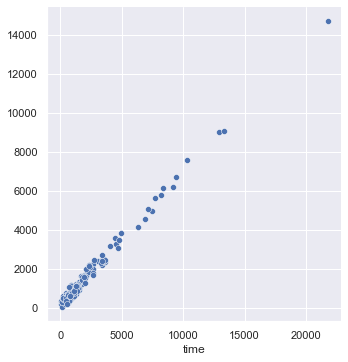

In [30]:
sns.relplot(x=X_test['time'],y=ychapo_model3)

In [31]:
alphas = 10**np.linspace(10,-2,100)*0.5
model4 = linear_model.RidgeCV(alphas=alphas,cv=3).fit(X_train, y_train)
print("Training test R² : "+str( model4.score( X_train, y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model4.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model4.predict(X_test))) + " ("+str( RMSE(y_test,model4.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8484152320124676
Test set Mean Absolue Error : 430.3923025474211
Test set RMSE : 883.7787058696397 (49.90201034034935% of the mean)


In [32]:
model5 = linear_model.LassoCV(alphas=alphas).fit(X_train, np.array(y_train).ravel())
print("Training test R² : "+str( model5.score( X_train, np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model5.predict(X_test) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model5.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model5.predict(X_test))) + " ("+str( RMSE(y_test,model5.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.838915836429003
Biais on test set : -13.886646935894298
Test set Mean Absolue Error : 435.39209241360567
Test set RMSE : 882.1920219268457 (49.81241922665278% of the mean)


In [33]:
ychapo_model5 = model5.predict(X_test)

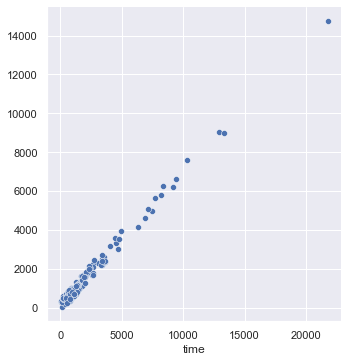

In [34]:
sns.relplot(x=X_test['time'],y=ychapo_model5)

In [35]:
model6 = linear_model.ElasticNetCV(l1_ratio=np.arange(0.01,1,0.01),random_state=0).fit(X_train, np.array(y_train).ravel())
print("Training test R² : "+str( model6.score( X_train, np.array(y_train).ravel() ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model6.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model6.predict(X_test))) + " ("+str( RMSE(y_test,model6.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8183016041249696
Test set Mean Absolue Error : 464.41229652765765
Test set RMSE : 942.6905166495674 (53.22842878784506% of the mean)


In [36]:
from sklearn import linear_model
model7 = linear_model.LinearRegression().fit(X_train[custom_features], y_train)
print("Training test R² : "+str( model7.score( X_train[custom_features], y_train ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model7.predict(X_test[custom_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model7.predict(X_test[custom_features]))) + " ("+str( RMSE(y_test,model7.predict(X_test[custom_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.8376459330107707
Test set Mean Absolue Error : 453.36263387336976
Test set RMSE : 885.6462065423937 (50.00745759458103% of the mean)


In [37]:
ychapo_test_model7_array = model7.predict(X_test[custom_features])
ychapo_model7 = []
for i in range(len(ychapo_test_model7_array)):
    ychapo_model7.append(ychapo_test_model7_array[i][0])

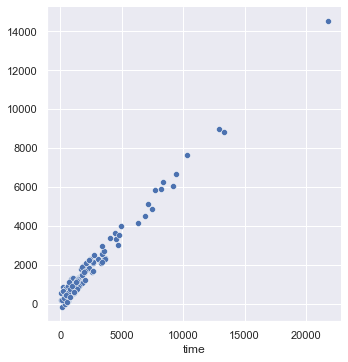

In [38]:
sns.relplot(x=X_test['time'],y=ychapo_model7)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':[71],'criterion':['mae']}
grid = GridSearchCV(RandomForestRegressor(random_state=0), parameters )
model8 = grid.fit(X_train,np.array(y_train).ravel())

In [40]:
grid.best_params_

{'criterion': 'mae', 'n_estimators': 71}

In [41]:
print("Training test R² : "+str( model8.score( X_train, np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model8.predict(X_test) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model8.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model8.predict(X_test))) + " ("+str( RMSE(y_test,model8.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.9753784000885308
Biais on test set : -29.8326561543172
Test set Mean Absolue Error : 396.5417386201268
Test set RMSE : 1035.8665784101886 (58.48955667718051% of the mean)


<AxesSubplot:>

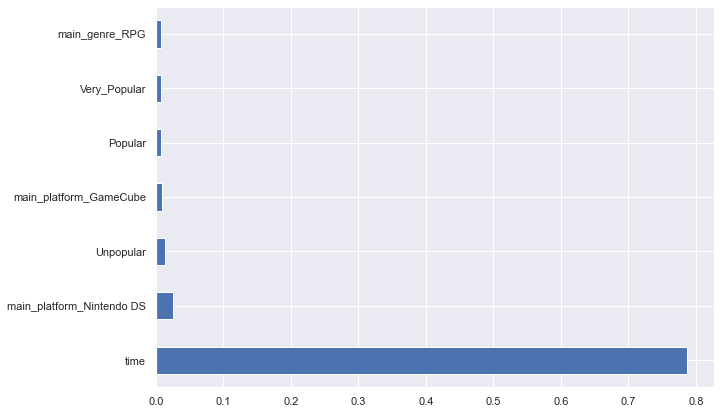

In [42]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(grid.best_estimator_.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [43]:
important_features = ['time','main_platform_Nintendo DS','Unpopular','Popular','Very_Popular','main_genre_RPG']

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':[89],'criterion':['mse'],'max_features':['log2']}
grid = GridSearchCV(RandomForestRegressor(random_state=0), parameters )
model8_2 = grid.fit(X_train[important_features],np.array(y_train).ravel())

In [44]:
grid.best_params_

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 89}

In [45]:
print("Training test R² : "+str( model8_2.score( X_train[important_features], np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model8_2.predict(X_test[important_features]) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model8_2.predict(X_test[important_features]))))
print( "Test set RMSE : "+ str(RMSE(y_test,model8_2.predict(X_test[important_features]))) + " ("+str( RMSE(y_test,model8_2.predict(X_test[important_features])) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test R² : 0.9842731996626477
Biais on test set : -60.89867714270221
Test set Mean Absolue Error : 411.2728425066492
Test set RMSE : 1168.6253293754992 (65.98569628706605% of the mean)


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'n_estimators':np.arange(70,90,1),'criterion':('mse','mae'),'max_features':('auto','log2','sqrt')}
grid = GridSearchCV(RandomForestRegressor(random_state=0), parameters,scoring='neg_mean_absolute_error',cv=3)
model9 = grid.fit(X_train,np.array(y_train).ravel())

In [47]:
grid.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 81}

In [48]:
print("Training test Neg Mean Absolute Error : "+str( model9.score( X_train, np.array(y_train).ravel() ) ) )
print("Biais on test set : "+str(bias( y_test,model9.predict(X_test) ) ) )
print("Test set Mean Absolue Error : "+str(MeanAbsoluteError(y_test,model9.predict(X_test))))
print( "Test set RMSE : "+ str(RMSE(y_test,model9.predict(X_test))) + " ("+str( RMSE(y_test,model9.predict(X_test)) * 100 / y_test[label].values.mean() ) +"% of the mean)")

Training test Neg Mean Absolute Error : -128.3730898919754
Biais on test set : -29.462390857040607
Test set Mean Absolue Error : 392.6801122741097
Test set RMSE : 1030.8129590909043 (58.20420723183609% of the mean)


<AxesSubplot:>

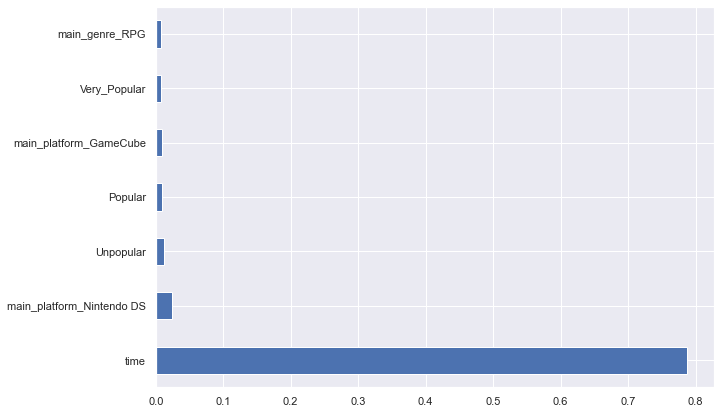

In [49]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(grid.best_estimator_.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'n_estimators':np.arange(70,90,1),'criterion':('mse','mae'),'max_features':('auto','log2','sqrt')}
grid = GridSearchCV(RandomForestRegressor(random_state=0), parameters,scoring='neg_mean_absolute_error',cv=3)
model10 = grid.fit(X_train,np.array(y_train).ravel())

In [51]:
test_times = []
for time in y_test['TAS_time'].values:
    test_times.append(datetime.timedelta(seconds=time))

predicted_times = []
for time in model9.predict(X_test):
    predicted_times.append(datetime.timedelta(seconds=time))

diff = []
for i in range(len(test_times)):
    diff.append(abs(test_times[i]-predicted_times[i]))

NameError: name 'datetime' is not defined

In [434]:
df = pd.DataFrame({'test_times':test_times,'predicted_times':predicted_times,'diff':diff})
df

,test_times,predicted_times,diff
0,0 days 00:18:37.780000,0 days 00:17:26.075658,0 days 00:01:11.704342
1,0 days 00:25:44.260000,0 days 00:20:42.977632,0 days 00:05:01.282368
2,0 days 00:18:36.010000,0 days 00:20:09.972368,0 days 00:01:33.962368
3,0 days 00:12:06.340000,0 days 00:11:13.780789,0 days 00:00:52.559211
4,0 days 00:07:00.410000,0 days 00:15:44.962763,0 days 00:08:44.552763
...,...,...,...
133,0 days 00:14:26.090000,0 days 00:15:11.449360,0 days 00:00:45.359360
134,0 days 00:13:34.820000,0 days 00:22:57.098553,0 days 00:09:22.278553
135,0 days 00:07:50.200000,0 days 00:07:07.007237,0 days 00:00:43.192763
136,0 days 00:04:02.730000,0 days 00:04:06.932368,0 days 00:00:04.202368


In [435]:
df.describe()

,test_times,predicted_times,diff
count,138,138,138
mean,0 days 00:29:42.850869565,0 days 00:29:22.706415789,0 days 00:07:30.897744528
std,0 days 00:38:50.683843698,0 days 00:33:54.563147954,0 days 00:19:21.452990931
min,0 days 00:00:15.850000,0 days 00:01:04.375395,0 days 00:00:02.054474
25%,0 days 00:09:19.497500,0 days 00:09:45.826217,0 days 00:00:46.338829250
50%,0 days 00:17:54.760000,0 days 00:18:58.204342500,0 days 00:01:52.667171
75%,0 days 00:33:03.240000,0 days 00:32:16.948322500,0 days 00:04:56.717072
max,0 days 04:58:50.200000,0 days 03:18:05.359737,0 days 02:31:30.785000


In [437]:
df[df['diff'] == df['diff'].max()]

,test_times,predicted_times,diff
75,0 days 04:58:50.200000,0 days 02:27:19.415000,0 days 02:31:30.785000
